In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_table('F:/data science course/datasets/classification/knn/fruit_data_with_colors.txt')

In [3]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
df.shape

(59, 7)

In [5]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [6]:
df.fruit_subtype.value_counts()

turkey_navel        10
unknown             10
spanish_belsan       6
cripps_pink          6
selected_seconds     6
braeburn             5
mandarin             5
golden_delicious     5
granny_smith         3
spanish_jumbo        3
Name: fruit_subtype, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [8]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [9]:
x=df.drop(['fruit_label','fruit_name','fruit_subtype'],axis=1)


In [10]:
x.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [11]:
y=df['fruit_name']
y.head()

0       apple
1       apple
2       apple
3    mandarin
4    mandarin
Name: fruit_name, dtype: object

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


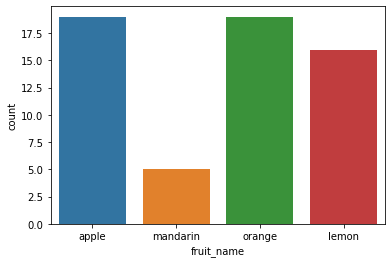

In [12]:
sns.countplot(df['fruit_name'])
plt.show()

<AxesSubplot:>

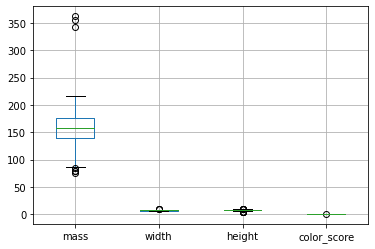

In [13]:
x.boxplot()

In [14]:
df.fruit_name.value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler  

In [16]:
sc=StandardScaler()
x=sc.fit_transform(x)   #transform to standard scale


In [17]:
b=sc.inverse_transform(x)  #transform to original
b[0:5]

array([[192.  ,   8.4 ,   7.3 ,   0.55],
       [180.  ,   8.  ,   6.8 ,   0.59],
       [176.  ,   7.4 ,   7.2 ,   0.6 ],
       [ 86.  ,   6.2 ,   4.7 ,   0.8 ],
       [ 84.  ,   6.  ,   4.6 ,   0.79]])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=3,test_size=0.3)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model=KNeighborsClassifier(n_neighbors=7)
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [22]:
ypred=model.predict(xtest)

In [23]:
ypred

array(['lemon', 'apple', 'lemon', 'apple', 'orange', 'apple', 'mandarin',
       'orange', 'apple', 'orange', 'orange', 'orange', 'lemon',
       'mandarin', 'orange', 'apple', 'lemon', 'lemon'], dtype=object)

In [24]:
pd.DataFrame({'actual':ytest,'predicted':ypred})

,actual,predicted
47,lemon,lemon
18,apple,apple
56,lemon,lemon
13,apple,apple
37,orange,orange
23,apple,apple
6,mandarin,mandarin
28,orange,orange
12,apple,apple
33,orange,orange


In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
accuracy_score(ytest,ypred)

1.0

In [27]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         5
       lemon       1.00      1.00      1.00         5
    mandarin       1.00      1.00      1.00         2
      orange       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [28]:
confusion_matrix(ytest,ypred)

array([[5, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 6]], dtype=int64)

In [29]:
pd.crosstab(ytest,ypred)

col_0,apple,lemon,mandarin,orange
fruit_name,,,,
apple,5,0,0,0
lemon,0,5,0,0
mandarin,0,0,2,0
orange,0,0,0,6


In [30]:
k=np.arange(1,15)
train_accuracy=np.empty(len(k))
test_accuracy=np.empty(len(k))
for i,k in enumerate(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    train_accuracy[i]=knn.score(xtrain,ytrain)
    test_accuracy[i]=knn.score(xtest,ytest)
    print(train_accuracy[i])
    print(test_accuracy[i])

1.0
0.9444444444444444
0.9512195121951219
0.8888888888888888
0.975609756097561
1.0
0.975609756097561
0.9444444444444444
0.9512195121951219
0.9444444444444444
0.975609756097561
0.8888888888888888
0.9512195121951219
1.0
0.926829268292683
0.9444444444444444
0.8292682926829268
0.7777777777777778
0.8292682926829268
0.7222222222222222
0.8048780487804879
0.7222222222222222
0.8292682926829268
0.6666666666666666
0.7073170731707317
0.6111111111111112
0.7317073170731707
0.6111111111111112


In [31]:
k=np.arange(1,15)

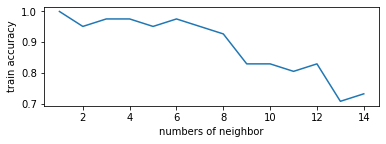

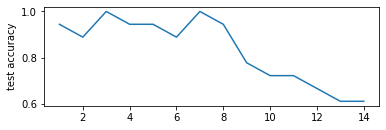

In [32]:
plt.subplot(211)
plt.plot(k,train_accuracy)
plt.xlabel('numbers of neighbor')
plt.ylabel('train accuracy')
plt.show()
plt.subplot(212)
plt.plot(k,test_accuracy)
plt.ylabel('test accuracy')
plt.show()

In [33]:
idx=np.where(test_accuracy==max(test_accuracy))
x=k[idx]
x

array([3, 7])

In [34]:
X=df.iloc[:,2:7]
X.head()

,fruit_subtype,mass,width,height,color_score
0,granny_smith,192,8.4,7.3,0.55
1,granny_smith,180,8.0,6.8,0.59
2,granny_smith,176,7.4,7.2,0.60
3,mandarin,86,6.2,4.7,0.80
4,mandarin,84,6.0,4.6,0.79


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
lb=LabelEncoder()

X=X.apply(lb.fit_transform)
X.head()

,fruit_subtype,mass,width,height,color_score
0,3,30,20,8,0
1,3,27,19,4,1
2,3,25,14,7,2
3,4,3,4,3,15
4,4,2,2,2,14


In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42,test_size=0.3)

In [38]:
model=KNeighborsClassifier(n_neighbors=2)
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2)

In [39]:
y_pred=model.predict(xtest)

In [40]:
pd.DataFrame({'actual':ytest,'predict':y_pred})

,actual,predict
0,apple,apple
5,mandarin,lemon
34,orange,orange
13,apple,apple
45,lemon,lemon
53,lemon,lemon
57,lemon,lemon
25,orange,orange
47,lemon,lemon
12,apple,apple


In [41]:
confusion_matrix(ytest,y_pred)

array([[5, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 2, 2, 0],
       [0, 0, 0, 4]], dtype=int64)

In [42]:
accuracy_score(ytest,y_pred)

0.8888888888888888

In [43]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [44]:
c=pd.DataFrame({'fruit_subdtype':[3],'mass':[90],'width':7,'height':[6.9],'color_score':5.5})

In [45]:
model.predict(c)

array(['orange'], dtype=object)

In [46]:
a=X.iloc[1:5,:]

a

,fruit_subtype,mass,width,height,color_score
1,3,27,19,4,1
2,3,25,14,7,2
3,4,3,4,3,15
4,4,2,2,2,14


In [47]:
model.predict(a)

array(['apple', 'apple', 'mandarin', 'mandarin'], dtype=object)

In [48]:
y[1:5]

1       apple
2       apple
3    mandarin
4    mandarin
Name: fruit_name, dtype: object

In [49]:
a=pd.DataFrame({'fruit_subdtype':[3],'mass':[27],'width':19,'height':[4],'color_score':1})

In [50]:
model.predict(a)

array(['apple'], dtype=object)